In [9]:
import os
import sys
import numpy as np
from scipy import signal
import pickle
import time
import neuron
from neuron import h
useCvode = True
cvode = h.CVode()
if useCvode:
    cvode.active(1)
from neuron import gui
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

In [10]:
!nrnivmodl mods

/home/mjy/project/bilinear_network/2021Neuron/L5PC
Mod files: "mods/mods/CaDynamics_E2.mod" "mods/mods/Ca_HVA.mod" "mods/mods/Ca_LVAst.mod" "mods/mods/epsp.mod" "mods/mods/Ih.mod" "mods/mods/Im.mod" "mods/mods/K_Pst.mod" "mods/mods/K_Tst.mod" "mods/mods/kv.mod" "mods/mods/na.mod" "mods/mods/Nap_Et2.mod" "mods/mods/NaTa_t.mod" "mods/mods/NaTs2_t.mod" "mods/mods/ProbAMPA.mod" "mods/mods/ProbAMPANMDA2_ratio.mod" "mods/mods/ProbAMPANMDA_EMS.mod" "mods/mods/ProbAMPANMDA.mod" "mods/mods/ProbGABAAB_EMS.mod" "mods/mods/ProbGABAA_EMS.mod" "mods/mods/ProbGABAA.mod" "mods/mods/ProbNMDA.mod" "mods/mods/SK_E2.mod" "mods/mods/SKv3_1.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


In [11]:
# AMPA synapse
gmax_AMPA = 0.00015 * 100
gmax_NMDA = 0.00015

def DefineSynapse_AMPA(segment, gMax=gmax_AMPA): # gMax=0.0004
    # synapse = h.ProbUDFsyn2(segment)
    synapse = h.ProbAMPA(segment)

    synapse.tau_r = 0.3
    synapse.tau_d = 3.0
    synapse.gmax = gMax
    synapse.e = 0
    synapse.Use = 1
    synapse.u0 = 0
    synapse.Dep = 0
    synapse.Fac = 0

    return synapse


# NMDA synapse
def DefineSynapse_NMDA(segment, gMax=gmax_NMDA):
    # synapse = h.ProbAMPANMDA2(segment)
    synapse = h.ProbNMDA(segment)

    synapse.tau_r = 2.0
    synapse.tau_d = 70.0
    synapse.gmax = gMax
    synapse.e = 0
    synapse.Use = 1
    synapse.u0 = 0
    synapse.Dep = 0
    synapse.Fac = 0

    return synapse

In [12]:
h.load_file('nrngui.hoc')
h.load_file("import3d.hoc")

morphologyFilename = "morphologies/cell1.asc"
biophysicalModelFilename = "L5PCbiophys5b.hoc"
biophysicalModelTemplateFilename = "L5PCtemplate_2.hoc"

h.load_file(biophysicalModelFilename)
h.load_file(biophysicalModelTemplateFilename)
L5PC = h.L5PCtemplate(morphologyFilename)

845.34678 
845.34678 


In [13]:
def AddAllSynapticEvents():
    for eventTime in eventsList:
        nc.event(eventTime)

In [18]:
totalSimDurationInMS = 1000
eventsList = [0]
ns = h.NetStim()
ns.start = 0
ns.number = 1
ns.interval = 100
ns.noise = 0
# exSynapse = DefineSynapse_AMPA(L5PC.apic[60](0))
exSynapse = DefineSynapse_NMDA(L5PC.soma[0](0))
syn = h.ExpSyn(L5PC.soma[0](0))
syn.tau = 7
# nc = h.NetCon(None, exSynapse)
nc = h.NetCon(None, syn)
nc.delay = 0
nc.weight[0] = 1

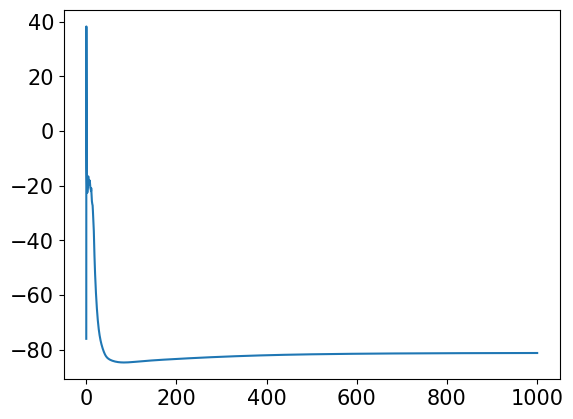

In [19]:
h.stdinit()
t = h.Vector()
t.record(h._ref_t)
v = h.Vector()
v.record(L5PC.soma[0](0.5)._ref_v)
fih = h.FInitializeHandler('nrnpython("AddAllSynapticEvents()")')
h.finitialize(-76)
# fih = h.FInitializeHandler('nrnpython("AddAllSynapticEvents()")')
h.continuerun(totalSimDurationInMS)
plt.plot(t, v)